## Load Libraries

In [1]:
from google.colab import files
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
from matplotlib import cm

## Load WBA Data

In [2]:
# re upload files everytime run

uploaded = files.upload()

Saving X_test.csv to X_test.csv
Saving X_train.csv to X_train.csv
Saving y_test.csv to y_test.csv
Saving y_train.csv to y_train.csv


In [3]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

frames_X = [X_train, X_test]
frames_y = [y_train, y_test]

X = pd.concat(frames_X)
y = pd.concat(frames_y)

X = X.iloc[:,13:].copy()

print(X.shape)
print(y.shape)

(191, 120)
(191, 1)
(48, 120)
(48, 1)
(239, 107)
(239, 1)


## Find Interquatile Range

In [4]:
# code from https://www.statology.org/interquartile-range-python/

def find_iqr(x):
  return np.percentile(x, [10, 90])

In [5]:
limits = pd.DataFrame(columns = ["frequency","lower","upper"])
for col in X.columns:
  low, high = find_iqr(X[col])
  limits.loc[len(limits.index)] = [col, low, high]

In [6]:
results = pd.DataFrame(columns = ["in_range","y_true","y_predict"])

for row in range(len(X.index)):
  in_range = 0
  for col in range(len(X.columns)):
    val = X.iloc[row,col]
    lower = limits.iloc[col,1]
    upper = limits.iloc[col,2]
    if val >= lower and val <= upper:
      in_range = in_range + 1
    y_pred = 0
    if in_range < 40:
      y_pred = 1
  results.loc[len(results.index)] = [in_range, y.iloc[row,0], y_pred]

In [7]:
y_true = results.loc[:,"y_true"].tolist()
y_pred = results.loc[:,"y_predict"].tolist()
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       201
           1       0.83      0.13      0.23        38

    accuracy                           0.86       239
   macro avg       0.85      0.56      0.57       239
weighted avg       0.85      0.86      0.81       239



In [8]:
confusion_matrix(y_true, y_pred)

array([[200,   1],
       [ 33,   5]])

In [14]:
performance = pd.DataFrame(columns=["threshold","accuracy","precision","recall","F1 Score"])
threshold_values = np.arange(1,108,1)

for val in threshold_values:
  y_true = results.loc[:,"y_true"].tolist()
  y_pred = results["in_range"].to_numpy() < val
  performance.loc[len(performance.index)] = [val, accuracy_score(y_true, y_pred), precision_score(y_true, y_pred), recall_score(y_true, y_pred), f1_score(y_true, y_pred)]

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

In [16]:
print(performance["accuracy"].max(), performance["accuracy"].idxmax())
print(performance["F1 Score"].max(), performance["F1 Score"].idxmax())
print(performance.iloc[45,])

0.8870292887029289 45
0.6190476190476191 69
threshold    46.000000
accuracy      0.887029
precision     0.866667
recall        0.342105
F1 Score      0.490566
Name: 45, dtype: float64


Text(0.5, 1.0, '10-90 IQR')

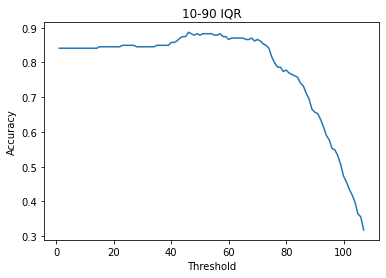

In [17]:
plt.plot(performance["threshold"], performance["accuracy"])
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.title("10-90 IQR")